In [1]:
import numpy as np
from numpy.testing import assert_array_almost_equal, assert_array_equal
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

For my Machine Learning final project, I have chosen to focus on the Diabetics dataset. My research will be structured into distinct sections:

- <a href='#1'>1. Missing Value Analysis</a>  
- <a href='#2'>2. Exploratory Data Analysis (EDA)</a>  
    - <a href='#2.1'>2.1. Insulin</a> 
    - <a href='#2.2'>2.2. Glucose</a> 
    - <a href='#2.3'>2.3. SkinThicness</a> 
    - <a href='#2.4'>2.4. BloodPressure</a> 
    - <a href='#2.5'>2.5. BMI</a> 
    - <a href='#2.6'>2.6. Age, DiabetesPedigreeFunction, Pregnancies</a> 
- <a href='#3'>3. Outlier Analysis</a>  
- <a href='#4'>4. Feature Engineering</a> 
- <a href='#5'>5. One-Hot Encoding</a> 
- <a href='#6'>6. Feature Standardization</a> 
- <a href='#7'>7. Model Selection and Training</a> 
    - <a href='#7.1'>7.1. First Principal-using numpy</a> 
        - <a href='#7.1.1'>7.1.1 Binary Logistic Regression</a> 
        - <a href='#7.1.2'>7.1.2 K-Nearest Neighbors</a> 
        - <a href='#7.1.3'>7.1.3 Support Vector Machines (SVMs) </a> 
    - <a href='#7.2'>7.2. Using Scikit-Learn</a> 
- <a href='#8'>8. Model Tuning/Hyperparameter Tuning </a>
    - <a href='#8.1'>8.1. Support Vector Machines (SVMs)</a> 
    - <a href='#8.2'>8.2. K-Nearest Neighbors</a> 
    - <a href='#8.3'>8.3. Binary Logistic Regression</a> 
- <a href='#9'>9. Model Comparison</a> 



In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

# <a id='1'>1. Missing Value Analysis</a> 

In [6]:
# Identifying the null values of the column 
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Replacing NAN value with 0 (if any)
df [['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df [['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace (0, np.NAN)

In [8]:
def missing_plot(dataset):
    """
    Plots the missing values count and percentage for each column in a DataFrame
    """

    null_counts = dataset.isnull().sum() 
    null_percentages = round(null_counts / len(dataset) * 100, 2) 

    trace = go.Bar(
        x=null_counts.index,  
        y=null_counts,
        opacity=0.8,
        text=null_percentages,  
        textposition='auto',
        marker=dict(color='#7EC0EE', line=dict(color='#000000', width=1.5))
    )

    layout = dict(title="Missing Values Analysis(%)")

    fig = go.Figure(data=[trace], layout=layout)
    fig.show() 

In [9]:
missing_plot(df)

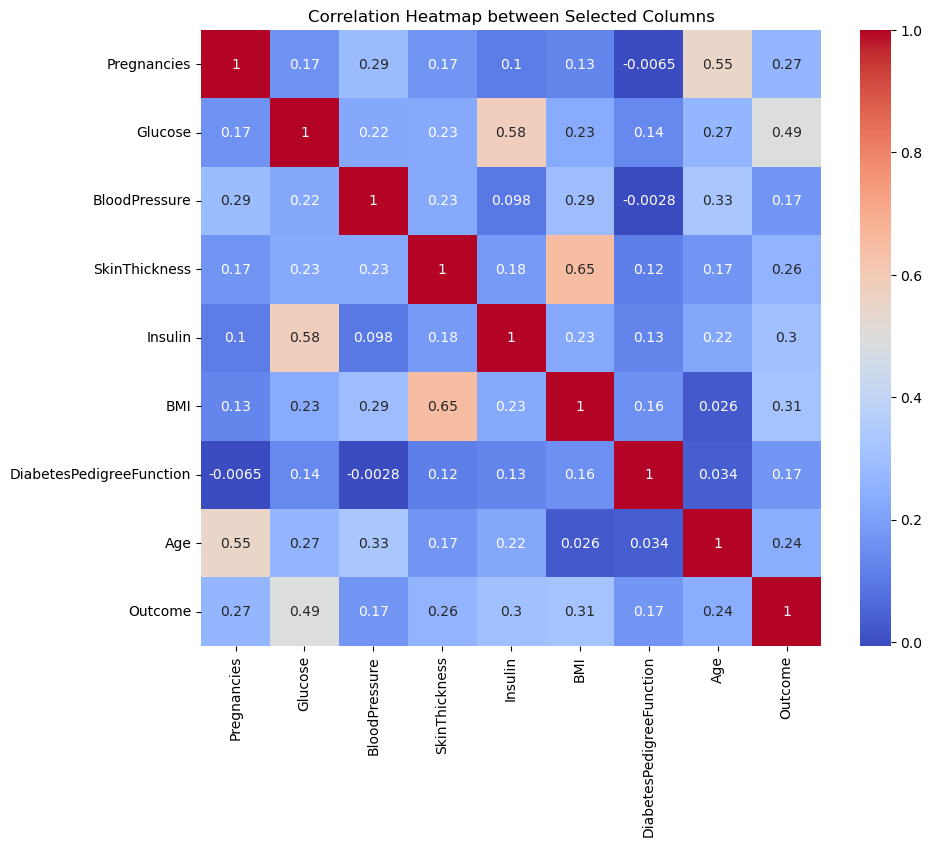

In [10]:
# Select desired columns
columns = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']
df_filtered = df[columns]

# Convert categorical variables to numerical (if needed)
df_filtered = pd.get_dummies(df_filtered, drop_first=True)

# Create correlation matrix
corr_matrix = df_filtered.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Selected Columns')
plt.show()

# <a id='2'>2. Exploratory Data Analysis and Missing Value Replacement</a> 

## <a id='2.1'>2.1 Insulin</a> 

In [11]:

Diabetes = df[(df['Outcome'] != 0)]
Healthy = df[(df['Outcome'] == 0)]

def create_density_plot(data_select, bin_width):
    colors = ['#7EC0EE', '#E69F00']
    """
    Develop a density plot using seaborn to compare two datasets
    """

    
    group_1 = Diabetes[data_select]
    group_2 = Healthy[data_select]
    # Combining data into a single DataFrame
    combined_data = pd.concat([
        pd.DataFrame({'value': group_1, 'group': 'diabetes'}),
        pd.DataFrame({'value': group_2, 'group': 'healthy'})
    ])

    # Create the density plot using Seaborn
    fig, ax = plt.subplots()
    sns.histplot(
        data=combined_data,
        x="value",
        hue="group",
        kde=True,
        stat="density",
        common_norm=False,
        ax=ax,
        palette=colors  # Apply custom colors
    )

    # Set plot title and labels
    ax.set_title(data_select, fontsize=12)
    ax.set_xlabel(data_select, fontsize=10)
    ax.set_ylabel("Density", fontsize=10)

    # Adjust margins
    plt.subplots_adjust(top=0.85, bottom=0.15)

    # Display the plot
    plt.show()


  



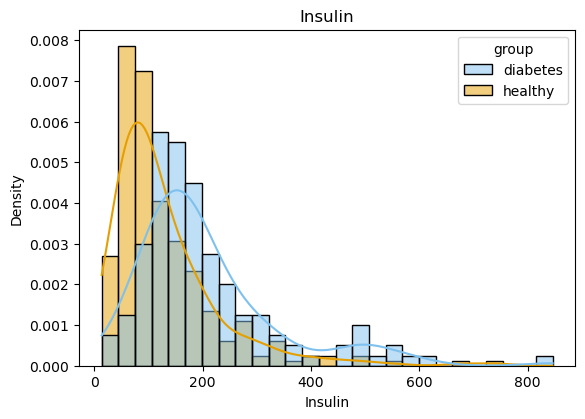

In [12]:
create_density_plot ('Insulin',0)

In [13]:
def calculate_medians(variable_name):
    """
    Computes median values of a variable for each target outcome group

    Args:
        variable_name (str): Name of the variable to calculate medians for

    Returns:
        pd.DataFrame: DataFrame containing median values for each target group
    """

    # Select relevant data and handle missing values
    data_subset = df[df[variable_name].notnull()][[variable_name, 'Outcome']]

    # Calculate medians by target group and format as DataFrame
    medians = (
        data_subset.groupby('Outcome')[variable_name]
        .median()
        .reset_index(name=f'{variable_name}_median')
    )

    return medians


In [14]:
calculate_medians('Insulin')

Outcome  Insulin_median
0        0           102.5
1        1           169.5

To address missing values in the Insulin column, we'll impute them with the median Insulin values observed for each corresponding Outcome group (169.5 for those with diabetes and 102.5 for those without diabetes)

In [15]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102.5
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 169.5

## <a id='2.2'>2.2 Glucose</a> 

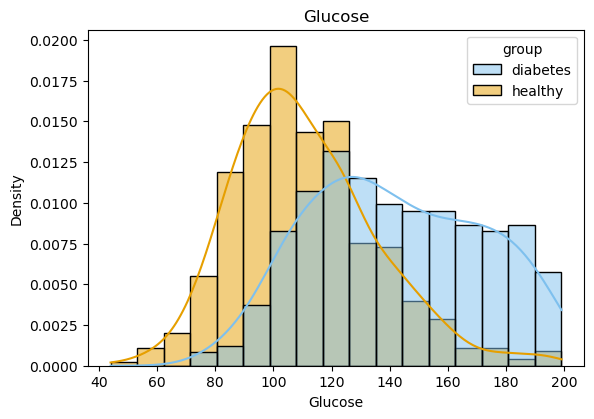

In [16]:
create_density_plot ('Glucose',0)

In [17]:
calculate_medians('Glucose')

Outcome  Glucose_median
0        0           107.0
1        1           140.0

To address missing values in the Glucose column, we'll impute them with the median Glucose values observed for each corresponding Outcome group (140 for those with diabetes and 107 for those without diabetes)

In [18]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 107
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 140

## <a id='2.3'>2.3 SkinThickness</a> 

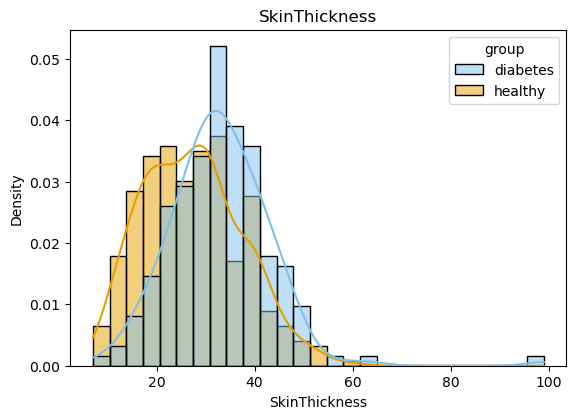

In [19]:
create_density_plot ('SkinThickness',0)

In [20]:
calculate_medians('SkinThickness')

Outcome  SkinThickness_median
0        0                  27.0
1        1                  32.0

To address missing values in the SkinThickness column, we'll impute them with the median SkinThickness values observed for each corresponding Outcome group (32 for those with diabetes and 27 for those without diabetes)

In [21]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32

## <a id='2.4'>2.4 BloodPressure</a> 

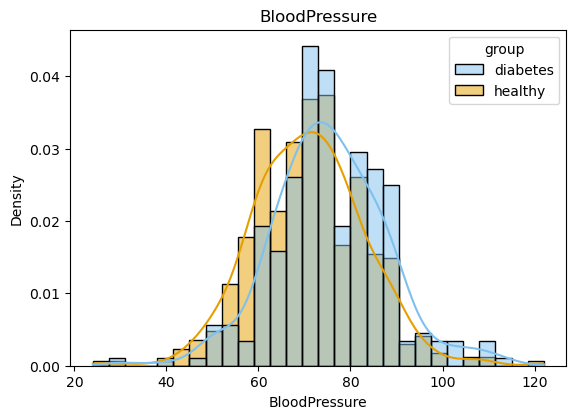

In [22]:
create_density_plot ('BloodPressure',10)

In [23]:
calculate_medians('BloodPressure')

Outcome  BloodPressure_median
0        0                  70.0
1        1                  74.5

To address missing values in the BloodPressure column, we'll impute them with the median BloodPressure values observed for each corresponding Outcome group (74.5 for those with diabetes and 70 for those without diabetes)

In [24]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

## <a id='2.5'>2.5 BMI</a> 

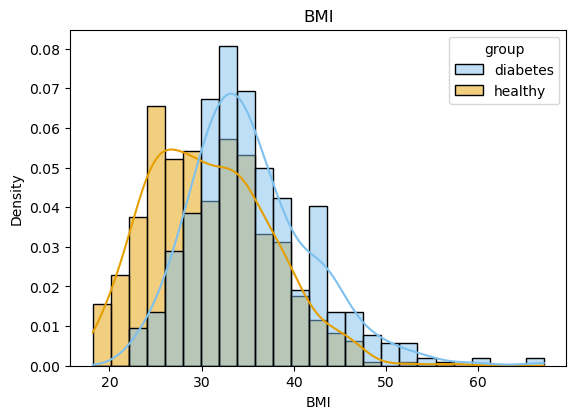

In [25]:
create_density_plot ('BMI',0)

In [26]:
calculate_medians('BMI')

Outcome  BMI_median
0        0        30.1
1        1        34.3

To address missing values in the BMI column, we'll impute them with the median BMI values observed for each corresponding Outcome group (34.3 for those with diabetes and 30.1 for those without diabetes)

In [27]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.1
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.3

## <a id='2.6'>2.6 Age,  DiabetesPedigreeFunction, Pregnancies</a> 

In [28]:
calculate_medians('DiabetesPedigreeFunction')

Outcome  DiabetesPedigreeFunction_median
0        0                            0.336
1        1                            0.449

In [29]:
calculate_medians('Pregnancies')

Outcome  Pregnancies_median
0        0                 3.0
1        1                 5.0

In [30]:
df.loc[(df['Outcome'] == 0 ) & (df['Pregnancies'].isnull()), 'Pregnancies'] = 3
df.loc[(df['Outcome'] == 1 ) & (df['Pregnancies'].isnull()), 'Pregnancies'] = 5

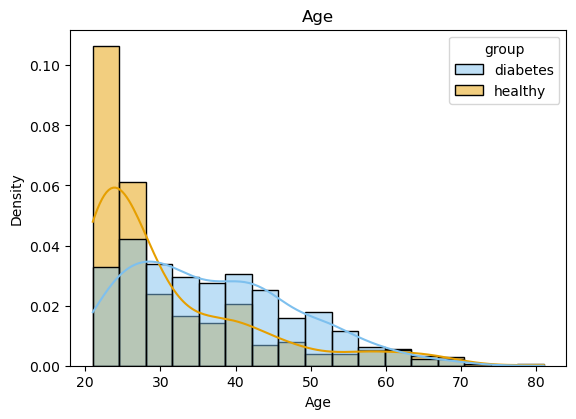

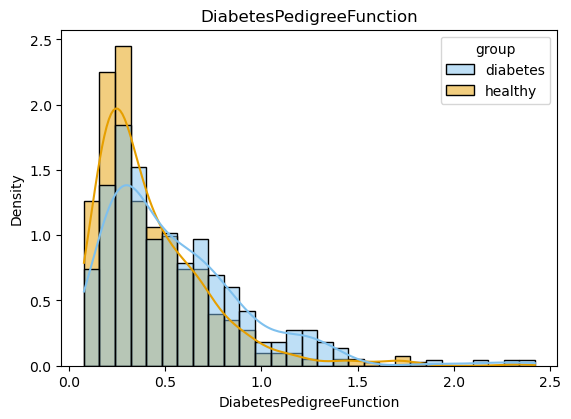

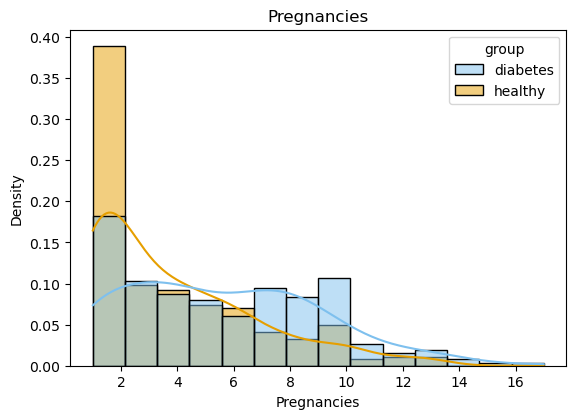

In [31]:
create_density_plot ('Age',0)
create_density_plot ('DiabetesPedigreeFunction',0)
create_density_plot ('Pregnancies',0)

In [32]:
missing_plot(df)

# <a id='3'>3. Outlier Analysis</a> 

In [33]:
df.describe().T

count        mean        std     min        25%  \
Pregnancies               768.0    4.377604   3.010736   1.000    2.00000   
Glucose                   768.0  121.677083  30.464161  44.000   99.75000   
BloodPressure             768.0   72.389323  12.106039  24.000   64.00000   
SkinThickness             768.0   29.089844   8.890820   7.000   25.00000   
Insulin                   768.0  141.753906  89.100847  14.000  102.50000   
BMI                       768.0   32.434635   6.880498  18.200   27.50000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078    0.24375   
Age                       768.0   33.240885  11.760232  21.000   24.00000   
Outcome                   768.0    0.348958   0.476951   0.000    0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              28.0000   32.00000   99.00  
Insulin                   102.5000  169.50000  846.00  
BMI                        32.0500   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

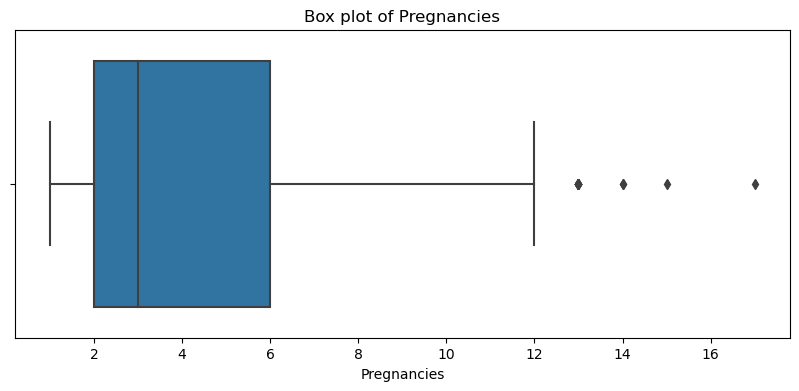

Feature: Pregnancies, Lower: -11.00, Upper: 21.00, Outliers: 0


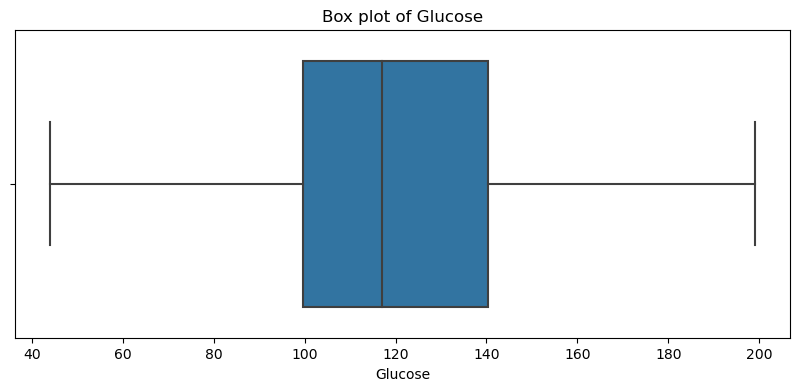

Feature: Glucose, Lower: -33.75, Upper: 287.45, Outliers: 0


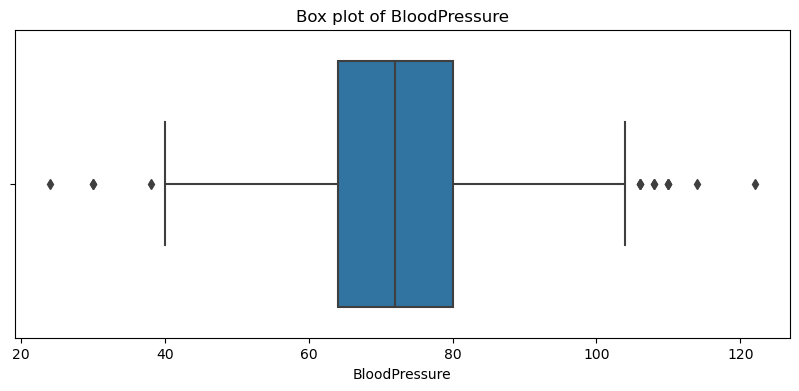

Feature: BloodPressure, Lower: 13.00, Upper: 133.00, Outliers: 0


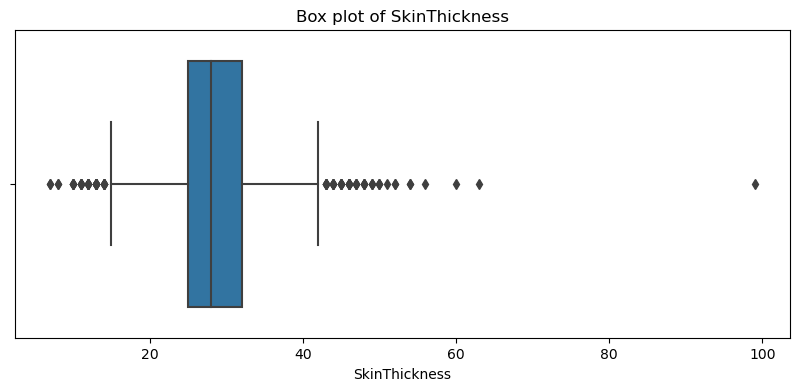

Feature: SkinThickness, Lower: -15.00, Upper: 73.00, Outliers: 1


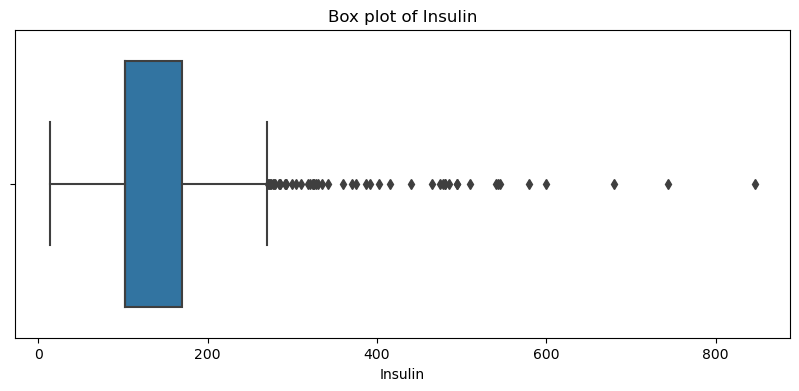

Feature: Insulin, Lower: -147.50, Upper: 424.50, Outliers: 18


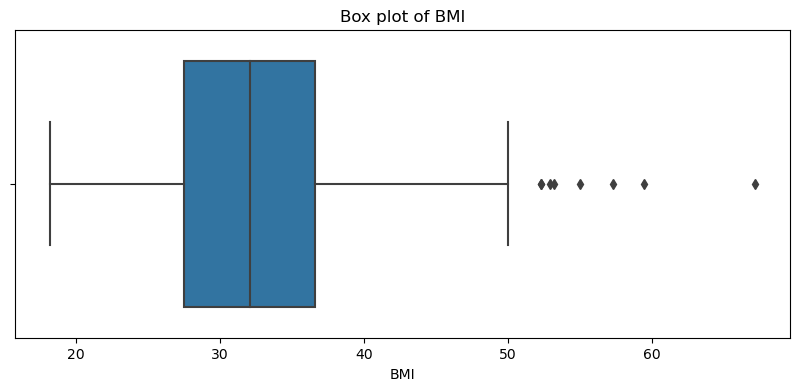

Feature: BMI, Lower: -2.25, Upper: 67.75, Outliers: 0


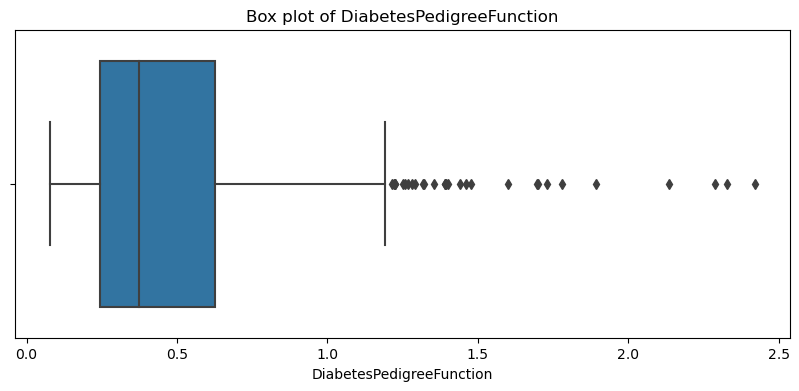

Feature: DiabetesPedigreeFunction, Lower: -0.91, Upper: 1.95, Outliers: 4


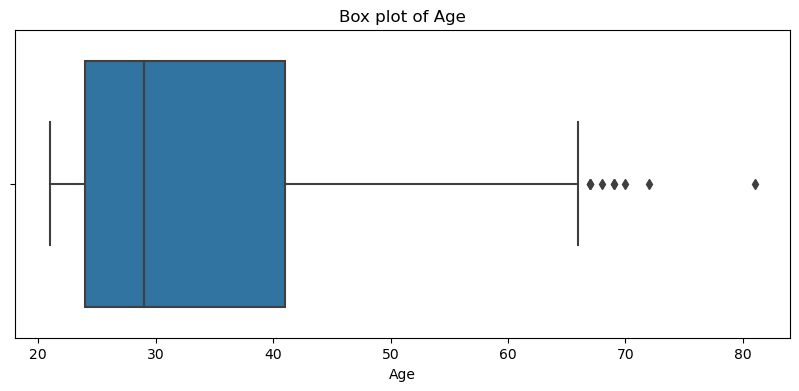

Feature: Age, Lower: -21.50, Upper: 94.50, Outliers: 0


In [34]:
def calculate_iqr_and_plot(df, features):
    """
    This function calculates the IQR for each feature in a dataframe and plots a boxplot

    Args:
        df: A pandas dataframe
        features: A list of features to calculate the IQR for

    Returns:
        None
    """
    for feature in features:
        Q1 = df[feature].quantile(0.10)
        Q3 = df[feature].quantile(0.90)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[feature] < lower) | (df[feature] > upper)]

        # Plot box plot
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df[feature])
        plt.title(f"Box plot of {feature}")
        plt.show()

        print(
            f"Feature: {feature}, Lower: {lower:.2f}, Upper: {upper:.2f}, Outliers: {len(outliers)}"
        )
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Call the function
calculate_iqr_and_plot(df, features)   

In [35]:
def calculate_iqr_and_plot(df, features):
    """
    This function calculates the IQR for each feature in a dataframe and plots a boxplot

    Args:
        df: A pandas dataframe
        features: A list of features to calculate the IQR for

    Returns:
        None
    """
    for feature in features:
        Q1 = df[feature].quantile(0.10)
        Q3 = df[feature].quantile(0.90)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Check for outliers
        if df[(df[feature] < lower) | (df[feature] > upper)].any(axis=None):
            print(feature, "yes")
        else:
            print(feature, "no")

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Call the function
calculate_iqr_and_plot(df.copy(), features)

Pregnancies no
Glucose no
BloodPressure no
SkinThickness yes
Insulin yes
BMI no
DiabetesPedigreeFunction yes
Age no


In [36]:
def identify_outliers_by_outcome(df, feature, outcome_column):
    for outcome in df[outcome_column].unique():
        subgroup = df[df[outcome_column] == outcome]

        # Calculate IQR bounds for outlier detection
        q1 = subgroup[feature].quantile(0.10)
        q3 = subgroup[feature].quantile(0.90)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Identify outliers
        outliers = subgroup.loc[(subgroup[feature] < lower_bound) | (subgroup[feature] > upper_bound)]

        # Print information about identified outliers
        print(f"Outliers for {feature} in Outcome {outcome}:")
        print(outliers[[feature, outcome_column]])

# Identify outliers for each feature based on Outcome
for feature in ["SkinThickness", "Insulin", "DiabetesPedigreeFunction"]:
    identify_outliers_by_outcome(df, feature, "Outcome")


Outliers for SkinThickness in Outcome 1:
     SkinThickness  Outcome
579           99.0        1
Outliers for SkinThickness in Outcome 0:
Empty DataFrame
Columns: [SkinThickness, Outcome]
Index: []
Outliers for Insulin in Outcome 1:
     Insulin  Outcome
8      543.0        1
13     846.0        1
409    579.0        1
584    600.0        1
655    540.0        1
753    510.0        1
Outliers for Insulin in Outcome 0:
     Insulin  Outcome
153    485.0        0
228    744.0        0
247    680.0        0
248    402.0        0
258    375.0        0
286    545.0        0
392    415.0        0
486    480.0        0
645    440.0        0
710    387.0        0
Outliers for DiabetesPedigreeFunction in Outcome 1:
     DiabetesPedigreeFunction  Outcome
445                      2.42        1
Outliers for DiabetesPedigreeFunction in Outcome 0:
     DiabetesPedigreeFunction  Outcome
58                      1.781        0
228                     2.329        0


Replace outliers in Insulin, Diabetes Pedigree Function, and Skin Thickness with the corresponding median value for each outcome group. Insulin medians are 102.5 for outcome 0 and 169.5 for outcome 1. Diabetes Pedigree Function medians are 0.336 for outcome 0 and 0.449 for outcome 1. Skin Thickness medians are 27 for outcome 0 and 32 for outcome 1.

In [37]:
def replace_outlier(df, row_number, column_name, replacement_value):
    """Replaces an outlier value at a specific row and column"""
    df.loc[row_number, column_name] = replacement_value

# Replace outlier values based on row numbers and column names
replace_outlier(df, 58, 'DiabetesPedigreeFunction', 0.336)  
replace_outlier(df, 228, 'DiabetesPedigreeFunction', 0.336) 
replace_outlier(df, 445, 'DiabetesPedigreeFunction', 0.449)
replace_outlier(df, 579, 'SkinThickness', 32) 
replace_outlier(df, 710, 'Insulin', 102.5)
replace_outlier(df, 645, 'Insulin', 102.5) 
replace_outlier(df, 486, 'Insulin', 102.5)
replace_outlier(df, 392, 'Insulin', 102.5)
replace_outlier(df, 286, 'Insulin', 102.5)
replace_outlier(df, 258, 'Insulin', 102.5)
replace_outlier(df, 248, 'Insulin', 102.5)
replace_outlier(df, 247, 'Insulin', 102.5)
replace_outlier(df, 228, 'Insulin', 102.5)
replace_outlier(df, 153, 'Insulin', 102.5)
replace_outlier(df, 8, 'Insulin', 169.5)
replace_outlier(df, 13, 'Insulin', 169.5)
replace_outlier(df, 409, 'Insulin', 169.5)
replace_outlier(df, 584, 'Insulin', 169.5)
replace_outlier(df, 655, 'Insulin', 169.5)
replace_outlier(df, 753, 'Insulin', 169.5)


# <a id='4'>4. Feature Engineering</a> 

In [38]:
def create_scatter(feat1, feat2):
    """Creates a scatter plot using Seaborn"""

    sns.scatterplot(data=df, x=feat1, y=feat2, hue='Outcome')
    plt.title(f"{feat1} vs {feat2}")
    plt.show()



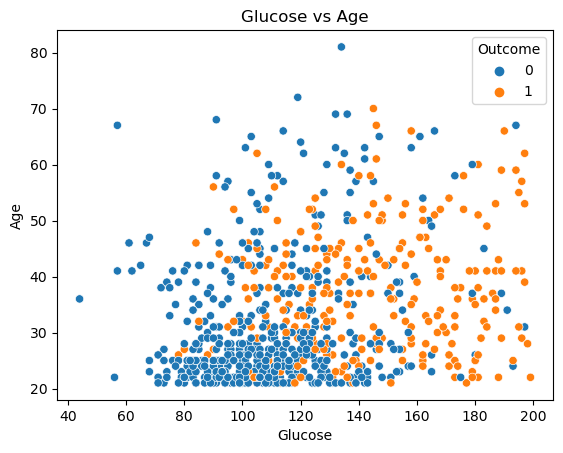

In [39]:
create_scatter('Glucose', 'Age')

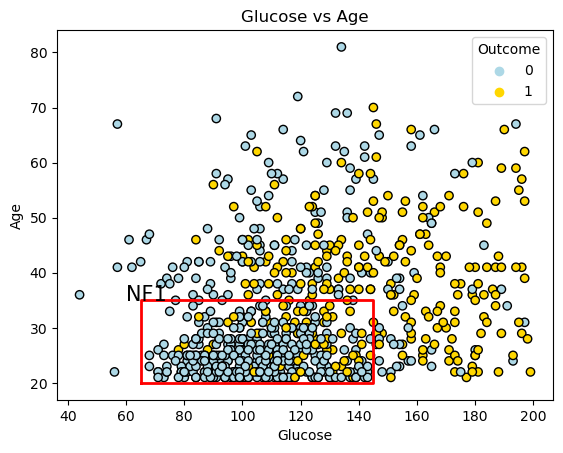

In [40]:

sns.scatterplot(
    x="Glucose", y="Age", hue="Outcome", data=df,
    palette={0: "lightblue", 1: "gold"}, edgecolor="black",
    linewidth=1  # Add a slight edge to the points
)

# Create the red box in a single step
plt.plot([65, 145, 145, 65, 65,65], [20, 20, 35, 35, 35,20], linewidth=2, color="red")

plt.annotate('NF1', size=15, color='black', xy=(80, 30), xytext=(60, 35))

plt.title('Glucose vs Age')
plt.show()


In [41]:
df.loc[:, 'NF1'] = 1  # Set all values in the 'NF1' column to 1
df.loc[(df['Age'] >= 20) & (df['Age'] <= 35) & (df['Glucose'] >= 65) & (df['Glucose'] <= 145), 'NF1'] = 0

In [42]:
print(df['NF1'].describe())  


count    768.000000
mean       0.453125
std        0.498122
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: NF1, dtype: float64


BMI Categories:

Underweight = <18.5,
Normal weight = 18.5–24.9,
Overweight = 25–29.9,
Obesity = BMI of 30 or greater. We see that Obesity starts with the value from BMI 30 and above

In [43]:
df.loc[:,'NF2']=1
df.loc[(df['BMI']<=30),'NF2']=0

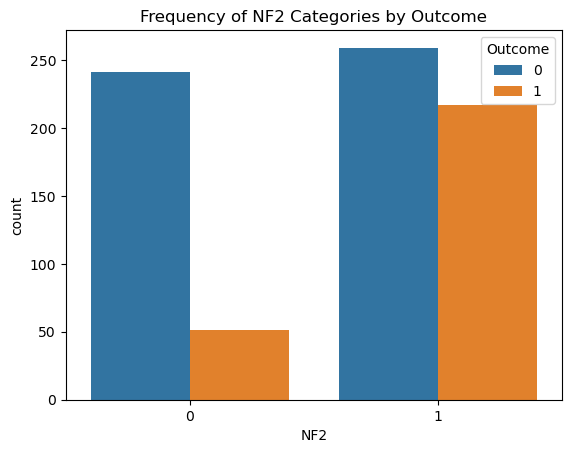

In [44]:
sns.countplot(x='NF2', hue='Outcome', data=df)
plt.title('Frequency of NF2 Categories by Outcome')
plt.show()

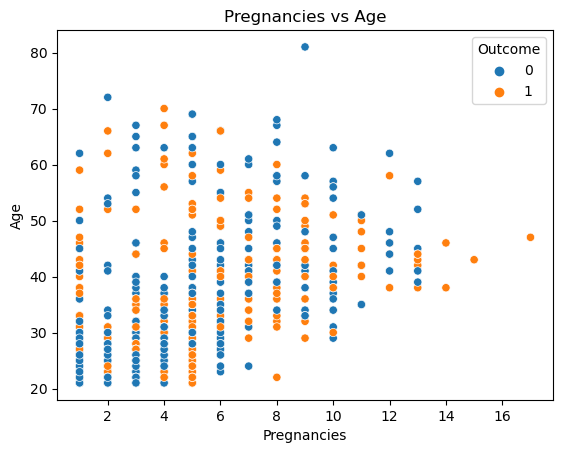

In [45]:
create_scatter('Pregnancies', 'Age')

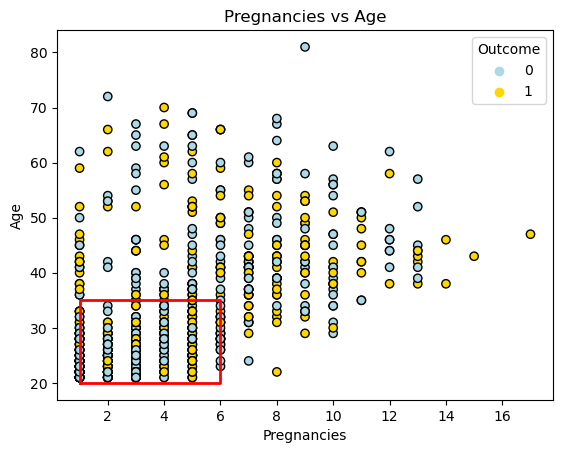

In [46]:
sns.scatterplot(
    x="Pregnancies", y="Age", hue="Outcome", data=df,
    palette={0: "lightblue", 1: "gold"}, edgecolor="black",
    linewidth=1  # Add a slight edge to the points
)

# Create the red box in a single step
plt.plot([1, 6, 6, 1, 1,1], [20, 20, 35, 35, 35,20], linewidth=2, color="red")

plt.annotate('NF3', size=15, color='black', xy=(80, 30), xytext=(60, 35),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('Pregnancies vs Age')
plt.show()


In [47]:
df.loc[:, 'NF3'] = 1 
df.loc[(df['Age'] >= 20) & (df['Age'] <= 35) & (df['Pregnancies'] >= 1) & (df['Pregnancies'] <= 6), 'NF3'] = 0

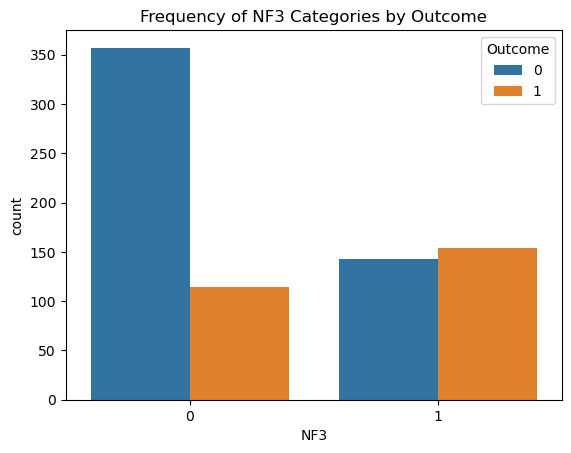

In [48]:
sns.countplot(x='NF3', hue='Outcome', data=df)
plt.title('Frequency of NF3 Categories by Outcome')
plt.show()

In [49]:
def create_new_insulin_feature(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [50]:
df["NF4"] = df.apply(create_new_insulin_feature, axis=1)

In [51]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  NF1  NF2  NF3       NF4  
0                     0.627   50        1    1    1    1  Abnormal  
1                     0.351   31        0    0    0    0    Normal  
2                     0.672   32        1    1    0    1  Abnormal  
3                     0.167   21        0    0    0    0    Normal  
4                     2.288   33        1    0    1    0  Abnormal

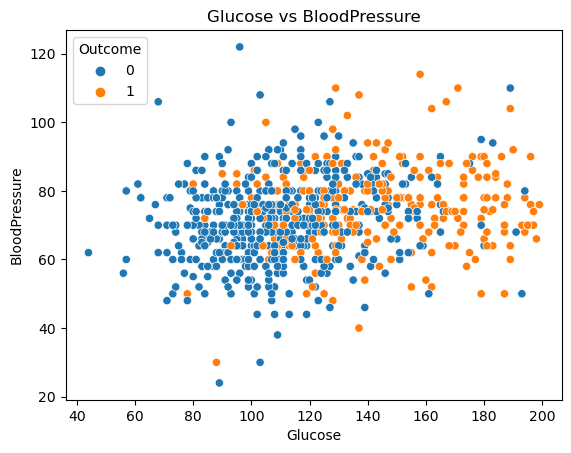

In [52]:
create_scatter('Glucose','BloodPressure')

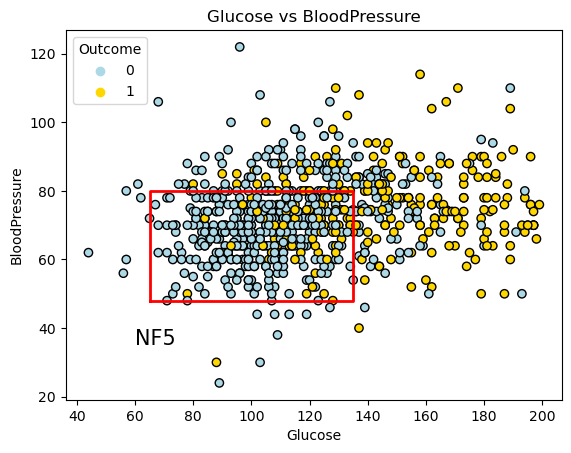

In [53]:
sns.scatterplot(
    x="Glucose", y="BloodPressure", hue="Outcome", data=df,
    palette={0: "lightblue", 1: "gold"}, edgecolor="black",
    linewidth=1  # Add a slight edge to the points
)

# Create the red box in a single step
plt.plot([65, 135, 135, 65, 65,65], [48, 48, 80, 80, 80,48], linewidth=2, color="red")

plt.annotate('NF5', size=15, color='black', xy=(80, 30), xytext=(60, 35))

plt.title('Glucose vs BloodPressure')
plt.show()


In [54]:
df.loc[:, 'NF5'] = 1  # Set all values in the 'NF5' column to 1
df.loc[(df['Glucose'] >= 65) & (df['Glucose'] <= 135) & (df['BloodPressure'] >= 48) & (df['BloodPressure'] <= 80), 'NF5'] = 0

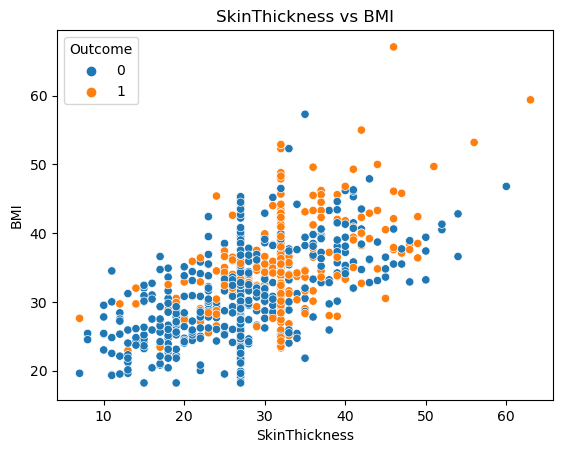

In [55]:
create_scatter('SkinThickness','BMI')

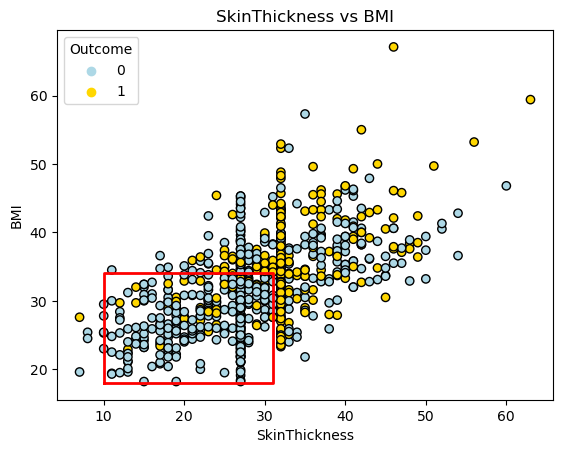

In [56]:
sns.scatterplot(
    x="SkinThickness", y="BMI", hue="Outcome", data=df,
    palette={0: "lightblue", 1: "gold"}, edgecolor="black",
    linewidth=1  # Add a slight edge to the points
)

# Create the red box in a single step
plt.plot([10, 31, 31, 10, 10,10], [18, 18, 34, 34, 34,18], linewidth=2, color="red")

plt.annotate('NF6', size=10, color='black', xy=(80, 30), xytext=(30, 15))

plt.title('SkinThickness vs BMI')
plt.show()


In [57]:
df.loc[:, 'NF6'] = 1  # Set all values in the 'NF6' column to 1
df.loc[(df['SkinThickness'] >= 10) & (df['SkinThickness'] <= 31) & (df['BMI'] >= 18) & (df['BMI'] <= 34), 'NF6'] = 0

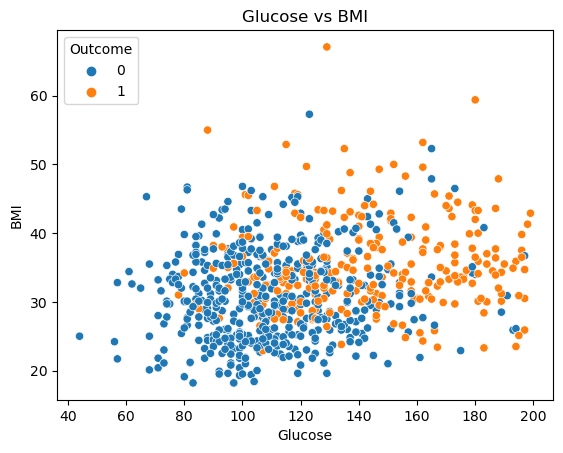

In [58]:
create_scatter('Glucose','BMI')

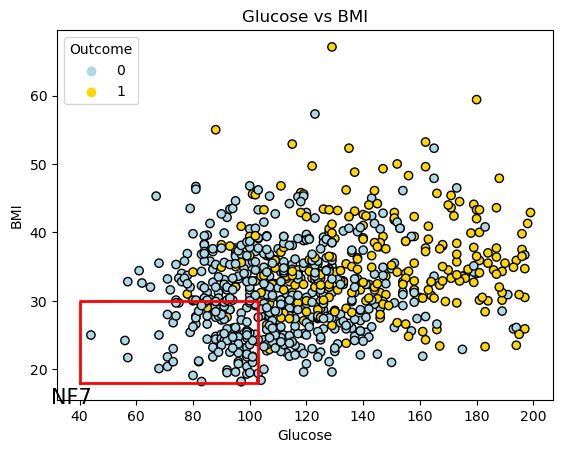

In [59]:
sns.scatterplot(
    x="Glucose", y="BMI", hue="Outcome", data=df,
    palette={0: "lightblue", 1: "gold"}, edgecolor="black",
    linewidth=1  # Add a slight edge to the points
)

# Create the red box in a single step
plt.plot([40, 103, 103, 40, 40,40], [18, 18, 30, 30, 30,18], linewidth=2, color="red")

plt.annotate('NF7', size=15, color='black', xy=(80, 30), xytext=(30, 15))

plt.title('Glucose vs BMI')
plt.show()

In [60]:
df.loc[:, 'NF7'] = 1  # Set all values in the 'NF7' column to 1
df.loc[(df['Glucose'] >= 40) & (df['Glucose'] <= 103) & (df['BMI'] >= 18) & (df['BMI'] <= 30), 'NF7'] = 0

# <a id='5'>5. One-hot Encoding</a> 

In [61]:
df = pd.get_dummies(df, columns =["NF4"], drop_first = False)

In [62]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  NF1  NF2  NF3  NF5  NF6  NF7  \
0                     0.627   50        1    1    1    1    1    1    1   
1                     0.351   31        0    0    0    0    0    0    0   
2                     0.672   32        1    1    0    1    1    1    1   
3                     0.167   21        0    0    0    0    0    0    0   
4                     2.288   33        1    0    1    0    1    1    1   

   NF4_Abnormal  NF4_Normal  
0             1           0  
1             0           1  
2             1           0  
3             0           1  
4             1           0

In [63]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NF1', 'NF2',
       'NF3', 'NF5', 'NF6', 'NF7', 'NF4_Abnormal', 'NF4_Normal'],
      dtype='object')

# <a id='6'>6. Feature Standartization</a> 

In [64]:
new_feature= df [['NF1', 'NF2','NF3', 'NF5', 'NF6', 'NF7', 'NF4_Abnormal', 'NF4_Normal']]

In [65]:
def standardise(data_matrix):
    row_of_means = np.mean(data_matrix, axis=0)
    standardised_matrix = data_matrix - row_of_means
    row_of_stds = np.std(standardised_matrix, axis=0)
    return (standardised_matrix / row_of_stds), row_of_means, row_of_stds

In [66]:
dataset_path = "diabetes.csv"
Pregnancies = np.genfromtxt(dataset_path,
                    delimiter=",",
                    skip_header=1,
                    usecols=[0]).astype(float)

Glucose = np.genfromtxt(dataset_path,
                     delimiter=",",
                     skip_header=1,
                     usecols=[1]).astype(float)

BloodPressure = np.genfromtxt(dataset_path,
                     delimiter=",",
                     skip_header=1,
                     usecols=[2]).astype(float)

SkinThickness = np.genfromtxt(dataset_path,
                     delimiter=",",
                     skip_header=1,
                     usecols=[3]).astype(float)

Insulin = np.genfromtxt(dataset_path,
                     delimiter=",",
                     skip_header=1,
                     usecols=[4]).astype(float)

BMI = np.genfromtxt(dataset_path,
                     delimiter=",",
                     skip_header=1,
                     usecols=[5]).astype(float)

DiabetesPedigreeFunction = np.genfromtxt(dataset_path,
                     delimiter=",",
                     skip_header=1,
                     usecols=[6]).astype(float)

Age = np.genfromtxt(dataset_path,
                     delimiter=",",
                     skip_header=1,
                     usecols=[7]).astype(int)

Outcome = np.genfromtxt(dataset_path,
                     delimiter=",",
                     skip_header=1,
                     usecols=[8]).astype(int)

data_input = np.c_[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,BMI, DiabetesPedigreeFunction, Age]
data_labels = Outcome.reshape(-1, 1)
data_input, data_row_of_means, data_row_of_stds = standardise(
    data_input)

In [67]:
data_input = np.hstack([data_input, new_feature.values])



# <a id='7'>7. Model Selection and Training</a> 

I initially implemented three models based on fundamental principles: logistic regression, k-Nearest Neighbors Classifier, and Support Vector Machines (SVMs). Subsequently, I employed Scikit-learn to explore additional models and facilitate a comparative analysis of the results.

## <a id='7.1'>7.1 First Principal-using numpy</a> 

### <a id='7.1.1'>7.1.1 Binary Logistic Regression</a> 

In [68]:
def classification_accuracy(estimated_labels, true_labels):
    equal_labels = estimated_labels == true_labels 
    return np.mean(equal_labels)

In [69]:
def linear_regression_data(data_inputs):
    first_column = np.ones((len(data_inputs), 1))
    X_matrix = np.c_[first_column, data_inputs]
    return X_matrix

In [70]:
def model_function(data_matrix, weights):
    return data_matrix @ weights

def logistic_function(inputs):
    return 1 / (1 + np.exp(-inputs))
def binary_prediction_function(data_matrix, weights):
    probability = logistic_function(model_function(data_matrix, weights))
    return probability > 1/2
def gradient_descent(objective,gradient,initial_weights,step_size=1,no_of_iterations=100,print_output=10):
    
    objective_values = []
    weights = np.copy(initial_weights)
    objective_values.append(objective(weights))
    
    for counter in range(no_of_iterations):
        weights -= step_size * gradient(weights)
        objective_values.append(objective(weights))
        if (counter + 1) % print_output == 0:
            print("Iteration {k}/{m}, objective = {o}.".format(k=counter+1,m=no_of_iterations, 
                                                               o=objective_values[counter]))
            
    print("Iteration completed after {k}/{m}, objective = {o}.".format(k=counter+ 1,
                                                                       m=no_of_iterations, 
                                                                       o=objective_values[counter]))
    return weights, objective_values

In [71]:
def binary_logistic_regression_cost_function(data_matrix, data_labels,weights):
    regression_outputs = model_function(data_matrix, weights)
    return np.mean(np.log(1 + np.exp(regression_outputs)) -data_labels * regression_outputs)
def binary_logistic_regression_gradient(data_matrix, data_labels, weights):
    return data_matrix.T @ (logistic_function(model_function(data_matrix, weights)) - data_labels) / len(data_matrix)

In [72]:
# first let's get the data matrix from the inputs
data_matrix = linear_regression_data(data_input)

# we then define the cost function
cost_function = lambda weights: binary_logistic_regression_cost_function(data_matrix,
                                                                                 data_labels, weights)
# then we get the gradient
gradient_function = lambda weights: binary_logistic_regression_gradient(data_matrix,
                                                                                data_labels, weights)

# start with w^0
initial_weights = np.zeros((len(data_matrix.T), 1))

# set the step size
step_size = 3.9 * len(data_matrix) / (np.linalg.norm(data_matrix))**2

# apply gradient descent
optimal_weights, objective_values_ =gradient_descent(cost_function,
                                                                     gradient_function,
                                                                     initial_weights,
                                                                     step_size,2000, 200)

# get the predicte labels
predicted_labels= binary_prediction_function(data_matrix,optimal_weights)

# measure the accuracy comparing predicted VS real labels
accuracy_rate = classification_accuracy(predicted_labels,data_labels)
print (accuracy_rate)

Iteration 200/2000, objective = 0.3270915577115636.
Iteration 400/2000, objective = 0.3250914707507864.
Iteration 600/2000, objective = 0.32438064466834216.
Iteration 800/2000, objective = 0.3239536018322154.
Iteration 1000/2000, objective = 0.3236640740950492.
Iteration 1200/2000, objective = 0.3234556979711558.
Iteration 1400/2000, objective = 0.3233005265377475.
Iteration 1600/2000, objective = 0.32318255163448684.
Iteration 1800/2000, objective = 0.32309162601851776.
Iteration 2000/2000, objective = 0.32302086865307295.
Iteration completed after 2000/2000, objective = 0.32302086865307295.
0.8697916666666666


In [73]:
# Calculate accuracy
accuracy = classification_accuracy(predicted_labels, data_labels)
print("Accuracy:", accuracy)

# Calculate precision, recall, F1-score
true_positives = np.sum((predicted_labels == 1) & (data_labels == 1))
true_negatives = np.sum((predicted_labels == 0) & (data_labels == 0))
false_positives = np.sum((predicted_labels == 1) & (data_labels == 0))
false_negatives = np.sum((predicted_labels == 0) & (data_labels == 1))

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * ((precision * recall) / (precision + recall))

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1_score)



Accuracy: 0.8697916666666666
Precision: 0.828125
Recall: 0.7910447761194029
F1 score: 0.8091603053435115



### <a id='7.1.2'>7.1.2 K-Nearest Neighbors</a> 

In [74]:
def train_test_split(data_matrix, data_labels, test_size=0.2):
    num_samples = len(data_matrix)
    num_test = int(test_size * num_samples)

    np.random.seed(42)  
    shuffled_indices = np.random.permutation(num_samples)
    data_matrix = data_matrix[shuffled_indices]
    data_labels = data_labels[shuffled_indices]

    train_size = num_samples - num_test
    X_train = data_matrix[:train_size]
    y_train = data_labels[:train_size]
    X_test = data_matrix[train_size:]
    y_test = data_labels[train_size:]

    return X_train, X_test, y_train, y_test

In [75]:
def predict_labels(X_train, y_train, X_test, num_neighbors):
    """Predicts labels for test data using k-Nearest Neighbors"""
    predicted_labels = []

    for test_point in X_test:
        # Calculate Euclidean distances between test point and all training points
        distances = np.linalg.norm(X_train - test_point, axis=1)
        
        # Get indices of k nearest neighbors
        k_nearest_indices = np.argsort(distances)[:num_neighbors]
        
        # Get labels of k nearest neighbors
        k_nearest_labels = y_train[k_nearest_indices].ravel()  
        
        # Predict label as the most common among k nearest labels
        predicted_label = np.argmax(np.bincount(k_nearest_labels))
        
        # Append predicted label to list
        predicted_labels.append(predicted_label)

    return np.array(predicted_labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_matrix, data_labels, test_size=0.2)

y_train = y_train.ravel()
y_train = y_train.reshape(-1, 1)
y_test=y_test.ravel()
y_test = y_test.reshape(-1, 1)

# number of neighbors
num_neighbors = 3

# Predict labels for test data
y_predicted = predict_labels(X_train, y_train, X_test, num_neighbors)

# Calculate prediction accuracy
accuracy = np.mean(y_predicted == y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5355632449058054


To calculated ROC curve using numpy, the following documentation has been followed https://numpy.org/doc/stable/reference/

In [76]:
def roc_curve(y_true, y_pred):
    """Calculates the ROC curve and returns FPR, TPR, and thresholds"""

    # Sort predicted scores and corresponding true labels
    sorted_indices = np.argsort(y_pred)[::-1]
    y_true_sorted = y_true[sorted_indices]

    # Initialize false positive rate (FPR) and true positive rate (TPR)
    tpr = []
    fpr = []

    # Initialize thresholds with first value as -inf
    thresholds = [float("-inf")]

    # Iterate through sorted predictions and update TPR, FPR, and thresholds
    prev_threshold = float("-inf")
    for i in range(len(y_pred)):
        if y_pred[sorted_indices[i]] != prev_threshold:
            thresholds.append(y_pred[sorted_indices[i]])
            prev_threshold = y_pred[sorted_indices[i]]
        tpr.append(np.sum(y_true_sorted[:i + 1]) / np.sum(y_true))
        fpr.append(np.sum(1 - y_true_sorted[:i + 1]) / np.sum(1 - y_true))

    return fpr, tpr, thresholds

def auc(fpr, tpr):
    """Calculates the area under the ROC curve using trapezoidal rule"""
    return np.trapz(tpr, fpr)


# Calculate accuracy
accuracy_Knn = np.mean(y_predicted == y_test)

# Calculate precision, recall, F1-score
tp = np.sum(y_predicted * y_test)  
fp = np.sum(y_predicted * (1 - y_test))  
fn = np.sum((1 - y_predicted) * y_test)  

precision_Knn = tp / (tp + fp)
recall_Knn = tp / (tp + fn)
f1_score_Knn = 2 * (precision_Knn * recall_Knn) / (precision_Knn + recall_Knn)

# Calculate ROC AUC
y_test_flat = y_test.ravel()  
fpr, tpr, thresholds = roc_curve(y_test_flat, y_predicted)
roc_auc_Knn = auc(fpr, tpr)  

# Print the evaluation metrics
print("Accuracy:", accuracy_Knn)
print("Precision:", precision_Knn)
print("Recall:", recall_Knn)
print("F1 score:", f1_score_Knn)
print("ROC AUC:", roc_auc_Knn)


Accuracy: 0.5355632449058054
Precision: 0.3790849673202614
Recall: 0.35294117647058826
F1 score: 0.365546218487395
ROC AUC: 0.829038112522686



### <a id='7.1.3'>7.1.3 Support Vector Machines (SVM)</a> 

In [77]:

def fit_svm(X_train, y_train, learning_rate=0.001, iterations=1000, regularization=0.01):
    """Trains an SVM classifier using gradient descent"""
    m, n = X_train.shape
    w = np.zeros(n)
    b = 0

    for _ in range(iterations):
        for i, x_i in enumerate(X_train):
            y_i = 1 if y_train[i] > 0 else -1  
            condition = y_i * (np.dot(x_i, w) - b) >= 1
            dw = 2 * regularization * w if condition else 2 * regularization * w - np.dot(x_i, y_i)
            db = 0 if condition else y_i
            w -= learning_rate * dw
            b -= learning_rate * db

    return w, b

def predict_svm(X, w, b):
    """Predicts labels using a trained SVM classifier"""
    output = np.dot(X, w) - b
    predicted_labels = np.sign(output)
    return np.where(predicted_labels <= -1, 0, 1)  # Convert -1 to 0 for consistency


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_matrix, data_labels, test_size=0.2)

    
y_train = y_train.ravel()
y_train = y_train.reshape(-1, 1)
y_test=y_test.ravel()
y_test = y_test.reshape(-1, 1)

# Train the SVM classifier
w, b = fit_svm(X_train, y_train)

# Make predictions on testing data
y_pred_svm = predict_svm(X_test, w, b)


In [78]:
# Calculate evaluation metrics
accuracy_svm = np.mean(y_pred_svm == y_test)

# Calculate precision, recall, F1-score
tp = np.sum(y_pred_svm * y_test)  
fp = np.sum(y_pred_svm * (1 - y_test)) 
fn = np.sum((1 - y_pred_svm) * y_test) 

precision_svm = tp / (tp + fp)
recall_svm = tp / (tp + fn)
f1_score_svm = 2 * (precision_svm * recall_svm) / (precision_svm + recall_svm)


fpr, tpr, thresholds = roc_curve(y_test_flat, y_pred_svm)
roc_auc_svm = auc(fpr, tpr)

# Print the evaluation metrics
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 score:", f1_score_svm)
print("ROC AUC:", roc_auc_svm)

Accuracy: 0.5371438335682857
Precision: 0.3790849673202614
Recall: 0.3464052287581699
F1 score: 0.36200906789142084
ROC AUC: 0.8916515426497278


I gained an understanding of Support Vector Machines from the book 'Support Vector Machines' by Ingo Steinwart and Andreas Christmann, published in 2008 by Springer Publishing Company, Incorporated. I used it as a reference for my code

## <a id='7.2'>7.2 Using Scikit-Learn</a> 

LogReg: 0.8580 (0.0351)
KNN: 0.8620 (0.0359)
DecTree: 0.8646 (0.0393)
RandForest: 0.8881 (0.0390)
SVM: 0.8685 (0.0328)
XGBoost: 0.9063 (0.0300)


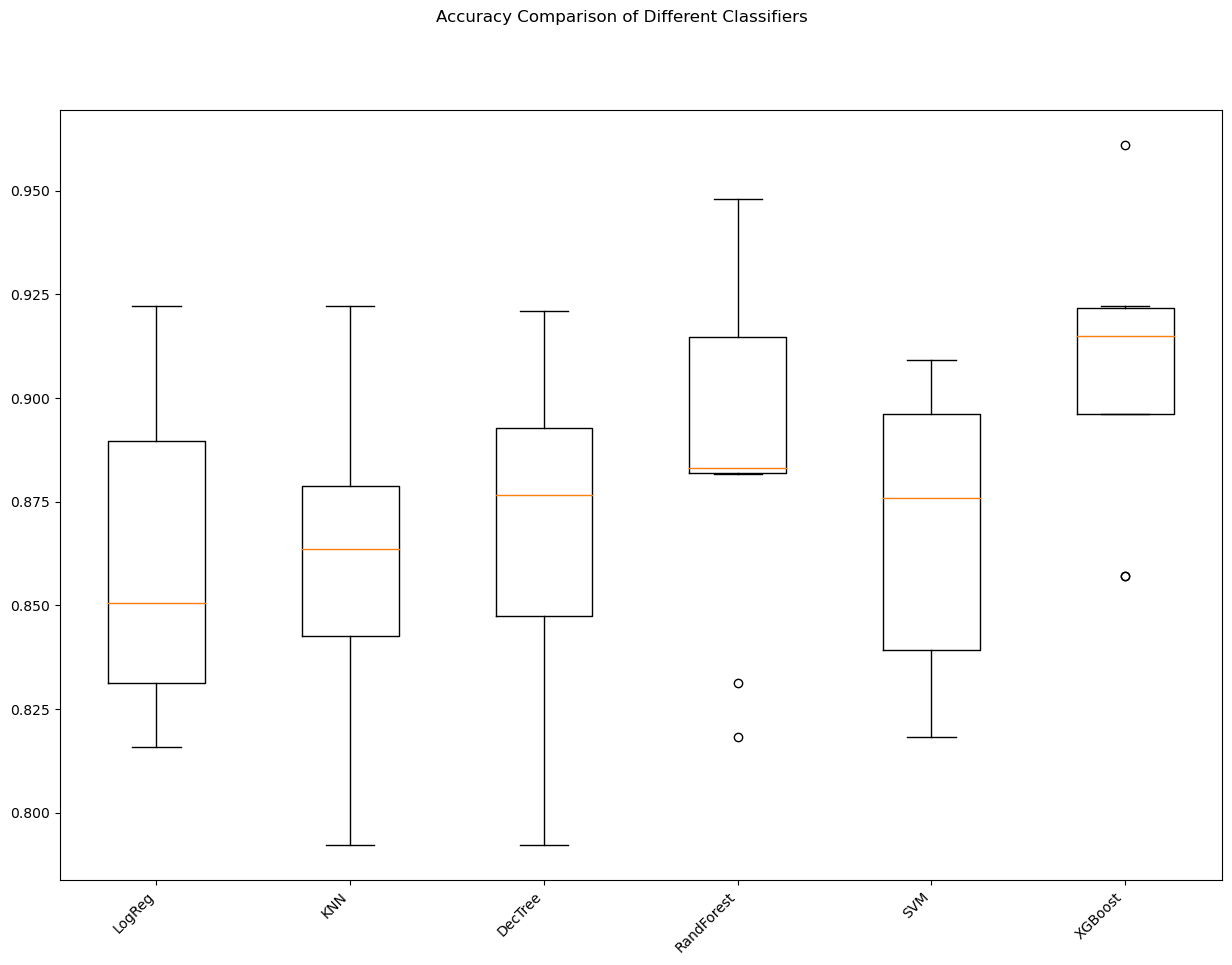

In [79]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt


def assess_classifiers(features, targets):
    """Evaluates multiple classifiers using cross-validation"""

    algorithms = [
        ("LogReg", LogisticRegression(random_state=12345)),
        ("KNN", KNeighborsClassifier()),
        ("DecTree", DecisionTreeClassifier(random_state=12345)),
        ("RandForest", RandomForestClassifier(random_state=12345)),
        ("SVM", SVC(gamma="auto", random_state=12345)),
        ("XGBoost", GradientBoostingClassifier(random_state=12345)),
    ]

    scores = []
    algo_names = []

    for name, algo in algorithms:
        # Create copies of features and targets within the loop
        features_copy = features.copy()  
        targets_copy = targets.ravel().copy()  

        cv_scores = cross_val_score(algo, features_copy, targets_copy, cv=10, scoring="accuracy")
        scores.append(cv_scores)
        algo_names.append(name)
        print(f"{name}: {cv_scores.mean():.4f} ({cv_scores.std():.4f})")

    # Visualize results
    plt.figure(figsize=(15, 10))
    plt.suptitle("Accuracy Comparison of Different Classifiers")
    plt.boxplot(scores)
    plt.xticks(ticks=range(1, len(algo_names) + 1), labels=algo_names, rotation=45, ha="right")
    plt.show()

features = data_matrix  
targets = data_labels
assess_classifiers(features, targets)


# <a id='8'>8. Model Tuning/Hyperparameter Tuning</a> 

## <a id='8.1'>8.1 Support Vector Machines (SVMs)</a> 

K-fold cross-validation is employed for hyperparameter tuning of the SVM model. This technique effectively divides the dataset into K folds of equal size, each serving as a testing set once while the remaining folds are used for training. In contrast, a single training-testing split was utilized in our previous SVM implementation

In [80]:
def fit_svm(X_train, y_train, learning_rate=0.001, iterations=1000, regularization=0.01):
    """Trains an SVM classifier using gradient descent"""
    m, n = X_train.shape
    w = np.zeros(n)
    b = 0

    for _ in range(iterations):
        for i, x_i in enumerate(X_train):
            y_i = 1 if y_train[i] > 0 else -1  
            condition = y_i * (np.dot(x_i, w) - b) >= 1
            dw = 2 * regularization * w if condition else 2 * regularization * w - np.dot(x_i, y_i)
            db = 0 if condition else y_i
            w -= learning_rate * dw
            b -= learning_rate * db

    return w, b

def predict_svm(X, w, b):
    """Predicts labels using a trained SVM classifier"""
    output = np.dot(X, w) - b
    predicted_labels = np.sign(output)
    return np.where(predicted_labels <= -1, 0, 1)  # Convert -1 to 0 for consistency

# Define the number of folds for cross-validation
num_folds = 10

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Split the data into folds
folds = np.array_split(np.arange(len(data_matrix)), num_folds)

# Iterate through each fold
for i in range(num_folds):
    validation_indices = folds[i]
    X_val = data_matrix[validation_indices]
    y_val = data_labels[validation_indices]
    training_indices = np.concatenate(folds[:i] + folds[i + 1:])
    X_train = data_matrix[training_indices]
    y_train = data_labels[training_indices]

    # Training the SVM model on the training set
    w, b = fit_svm(X_train, y_train)

    # Make predictions on the validation set
    y_pred_val = predict_svm(X_val, w, b)

    # Calculate evaluation metrics for this fold
    accuracy_svm_n = np.mean(y_pred_val == y_val)
    tp = np.sum(y_pred_val * y_val)
    fp = np.sum(y_pred_val * (1 - y_val))
    fn = np.sum((1 - y_pred_val) * y_val)
    precision_svm_n = tp / (tp + fp)
    recall_svm_n = tp / (tp + fn)
    f1_score_svm_n = 2 * (precision_svm_n * recall_svm_n) / (precision_svm_n + recall_svm_n)
    fpr, tpr, _ = roc_curve(y_val, y_pred_val)
    roc_auc_svm_n = auc(fpr, tpr)

    # Append scores to lists
    accuracy_scores.append(accuracy_svm_n)
    precision_scores.append(precision_svm_n)
    recall_scores.append(recall_svm_n)
    f1_scores.append(f1_score_svm_n)
    roc_auc_scores.append(roc_auc_svm_n)
    

# Print Average scores across folds
print("Average Accuracy:", np.mean(accuracy_scores))
print("Average Precision:", np.mean(precision_scores))
print("Average Recall:", np.mean(recall_scores))
print("Average F1 Score:", np.mean(f1_scores))
print("Average ROC AUC:", np.mean(roc_auc_scores))

Average Accuracy: 0.5553208465456189
Average Precision: 0.34897470950102527
Average Recall: 0.34121667805878336
Average F1 Score: 0.3438144620700712
Average ROC AUC: 0.813799109564625


## <a id='8.2'>8.2 K-Nearest Neighbors (K-NN)</a> 

Grid search has been used for hyperparameter tuning in k-Nearest Neighbors (kNN). It systematically explores various combinations of hyperparameter values to find the optimal configuration that yields the best performance

In [81]:
def auc(fpr, tpr):
    """Calculates the AUC using the trapezoidal rule"""
    return np.trapz(tpr, fpr)

def predict_labels(X_train, y_train, X_test, num_neighbors):
    """Predicts labels for test data using k-Nearest Neighbors"""
    predicted_labels = []

    for test_point in X_test:
        distances = np.linalg.norm(X_train - test_point, axis=1) 
        k_nearest_indices = np.argsort(distances)[:num_neighbors]
        k_nearest_labels = y_train[k_nearest_indices].ravel()
        predicted_label = np.argmax(np.bincount(k_nearest_labels))
        predicted_labels.append(predicted_label)

    return np.array(predicted_labels)

# Define the hyperparameter grid for grid search
num_neighbors_range = np.arange(1, 31)

# Initialize variables to store best model and accuracy
best_accuracy = 0
best_num_neighbors = None

# Perform grid search
for num_neighbors in num_neighbors_range:
    y_predicted = predict_labels(X_train, y_train, X_test, num_neighbors)

    # Calculate evaluation metrics using NumPy
    accuracy = np.mean(y_predicted == y_test)
    tp = np.sum(y_predicted * y_test)
    fp = np.sum(y_predicted * (1 - y_test))
    fn = np.sum((1 - y_predicted) * y_test)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    y_test_flat = y_test.ravel()
    fpr, tpr, thresholds = roc_curve(y_test_flat, y_predicted)
    roc_auc = auc(fpr, tpr) 

    # Print evaluation metrics
    print(f"Accuracy with {num_neighbors} neighbors: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1_score:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # Update best model and accuracy if applicable
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_num_neighbors = num_neighbors

# Print final results
print(f"Best accuracy with tuned hyperparameters: {best_accuracy:.4f}")
print(f"Best number of neighbors: {best_num_neighbors}")

Accuracy with 1 neighbors: 0.5292
Precision: 0.3791, Recall: 0.3791, F1-score: 0.3791
ROC AUC: 0.9884
Accuracy with 2 neighbors: 0.5482
Precision: 0.3791, Recall: 0.3007, F1-score: 0.3353
ROC AUC: 0.9016
Accuracy with 3 neighbors: 0.5371
Precision: 0.3791, Recall: 0.3464, F1-score: 0.3620
ROC AUC: 0.9376
Accuracy with 4 neighbors: 0.5545
Precision: 0.3791, Recall: 0.2745, F1-score: 0.3184
ROC AUC: 0.8446
Accuracy with 5 neighbors: 0.5403
Precision: 0.3791, Recall: 0.3333, F1-score: 0.3547
ROC AUC: 0.9187
Accuracy with 6 neighbors: 0.5545
Precision: 0.3791, Recall: 0.2745, F1-score: 0.3184
ROC AUC: 0.8472
Accuracy with 7 neighbors: 0.5435
Precision: 0.3791, Recall: 0.3203, F1-score: 0.3472
ROC AUC: 0.8644
Accuracy with 8 neighbors: 0.5545
Precision: 0.3791, Recall: 0.2745, F1-score: 0.3184
ROC AUC: 0.8385
Accuracy with 9 neighbors: 0.5482
Precision: 0.3791, Recall: 0.3007, F1-score: 0.3353
ROC AUC: 0.8414
Accuracy with 10 neighbors: 0.5545
Precision: 0.3791, Recall: 0.2745, F1-score: 0.

## <a id='8.3'>8.3 Binary Logistic Regression</a> 

In [82]:
# first let's get the data matrix from the inputs
data_matrix = linear_regression_data(data_input)

# we then define the cost function
cost_function = lambda weights: binary_logistic_regression_cost_function(data_matrix,
                                                                                 data_labels, weights)
# then we get the gradient
gradient_function = lambda weights: binary_logistic_regression_gradient(data_matrix,
                                                                                data_labels, weights)

# start with w^0
initial_weights = np.zeros((len(data_matrix.T), 1))

# set the step size (Calculated the optimal step size is 0.1)
step_size = 0.1

# apply gradient descent
optimal_weights, objective_values_ =gradient_descent(cost_function,
                                                                     gradient_function,
                                                                     initial_weights,
                                                                     step_size,2000, 200)

# get the predicte labels
predicted_labels= binary_prediction_function(data_matrix,optimal_weights)

# measure the accuracy comparing predicted VS real labels
accuracy_rate = classification_accuracy(predicted_labels,data_labels)
print ("Accuracy:",accuracy_rate)

Iteration 200/2000, objective = 0.3416256817661239.
Iteration 400/2000, objective = 0.3297011056090588.
Iteration 600/2000, objective = 0.3269942787136388.
Iteration 800/2000, objective = 0.32597345297426344.
Iteration 1000/2000, objective = 0.32542201779457597.
Iteration 1200/2000, objective = 0.3250489581901295.
Iteration 1400/2000, objective = 0.3247652409308192.
Iteration 1600/2000, objective = 0.32453654137957844.
Iteration 1800/2000, objective = 0.32434622789549666.
Iteration 2000/2000, objective = 0.3241846117616288.
Iteration completed after 2000/2000, objective = 0.3241846117616288.
Accuracy: 0.87109375


# <a id='9'>9. Model Comparison</a> 

After obtaining initial results from the algorithms implemented following first principles method, I proceeded with model tuning, also known as hyperparameter tuning. Results are shown below-


| Model Name                     | Result Before Model Tuning   | Final Result/Result After Model Tuning |
|:-------------------------------|:-----------------------------|:-----------------------------|
| Binary Logistic Regression     |Accuracy: 0.86              | Accuracy: 0.87   |
|                                |Precision:0.83              | Precision:0.83   |
|                                |Recall:   0.78              | Recall: 0.78     |
|                                |F1 score: 0.80              | F1 Score: 0.80   |
|                                |ROC AUC: 0.89               | ROC AUC: 0.81    |
| K-Neighbors Classifier         |Accuracy: 0.53              | Accuracy: 0.56   |
|                                |Precision: 0.37             | Precision: 0.37  |
|                                |Recall: 0.35                | Recall: 0.24     |
|                                |F1 score: 0.36              | F1 score: 0.30   |                                 |                                |ROC AUC: 0.82               | ROC AUC: 0.83    | 
| Support vector machines        |Accuracy: 0.53              | Accuracy: 0.55   |
|                                |Precision:0.37              | Precision: 0.34  |
|                                |Recall: 0.34                | Recall: 0.34     |
|                                |F1 score: 0.36              | F1 Score: 0.34   |
|                                |ROC AUC: 0.89               | ROC AUC: 0.81    |

After using scikit learn, the accuracy level of the different algorithm has been calculated as shown below:


LogReg: 0.8580

KNN: 0.8620 

DecTree: 0.8646

RandForest: 0.8816

SVM: 0.8685

XGBoost: 0.9024

While logistic regression achieves a respectable accuracy of around 87% when implemented from first principles, XGBoost takes the lead with roughly 90% accuracy as analyzed using scikit-learn. **The custom logistic regression model (87% accuracy) built from first principles performs surprisingly well compared to the readily available scikit-learn  (85%) implementation.**